# <center>Logistic Regression for prediction of authenticity of banknote<center>


###### OBJECTIVE: Apply classification algorithm to a problem related to the Business Analytics or Finance domains. 

### DATA DESCRIPTION

The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
data = pd.read_excel("D:/MSTAT/SEM 3/Machine Learning/ML LAB/l2_banknote_dataset.xlsx")
data1 = pd.read_excel("D:/MSTAT/SEM 3/Machine Learning/ML LAB/l2_banknote_dataset.xlsx")

In [3]:
data.head()

,V,S,K,E,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Attribiute Information

There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

V - Variance of Wavelet Transformed image (continuous).

S - Skewness of Wavelet Transformed image (continuous).

K - Kurtosis of Wavelet Transformed image (continuous).

E - Entropy of image (continuous).

Class - 0 for authentic, 1 for inauthentic (Study variable).

In [4]:
data.shape

(1372, 5)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       1372 non-null   float64
 1   S       1372 non-null   float64
 2   K       1372 non-null   float64
 3   E       1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### EDA

In [27]:
data.describe()

,V,S,K,E,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [28]:
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

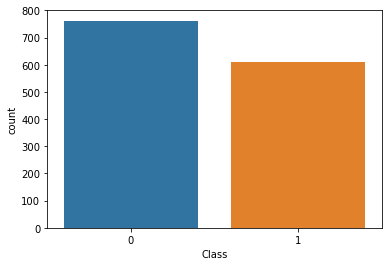

In [30]:
sns.countplot(x='Class',data=data)
plt.show()


In [31]:
count_no_sub = len(data[data['Class']==0])
count_sub = len(data[data['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of Authentic note is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of inauthentic", pct_of_sub*100)

percentage of Authentic note is 55.539358600583085
percentage of inauthentic 44.460641399416915


Here, we can observe that there is no much differnce in percentage between authentic and inauthentic class. Hence need not go for Smoting.

In [7]:
data.groupby('Class').mean()

,V,S,K,E
Class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [32]:
cat = pd.cut(data.E,bins = [-8.548200,-0.586650,2.449500],labels = ['<=median','>median'])
data.insert(4,'Entropy_category',cat)

In [33]:
data.head()

,V,S,K,E,Entropy_category,Class
0,3.62160,8.6661,-2.8073,-0.44699,>median,0
1,4.54590,8.1674,-2.4586,-1.46210,<=median,0
2,3.86600,-2.6383,1.9242,0.10645,>median,0
3,3.45660,9.5228,-4.0112,-3.59440,<=median,0
4,0.32924,-4.4552,4.5718,-0.98880,<=median,0


In [34]:
pd.crosstab(data.Entropy_category,data.Class)

Class,0,1
Entropy_category,,
<=median,367,319
>median,394,291


Text(0, 0.5, 'No.of images')

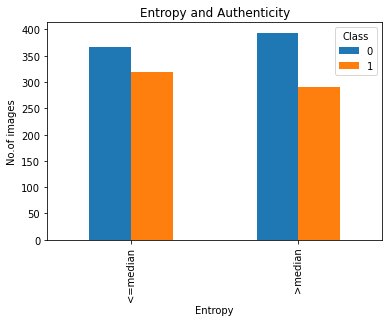

In [23]:
pd.crosstab(data.Entropy_category,data.Class).plot(kind='bar')
plt.title('Entropy and Authenticity')
plt.xlabel('Entropy')
plt.ylabel('No.of images')

Text(0, 0.5, 'Proportion of images')

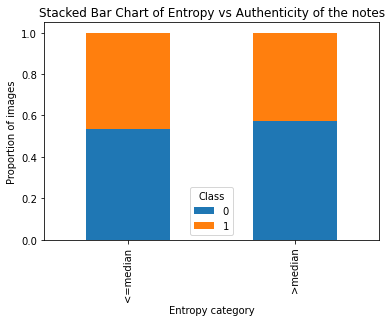

In [12]:
table=pd.crosstab(data.Entropy_category,data.Class)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Entropy vs Authenticity of the notes')
plt.xlabel('Entropy category')
plt.ylabel('Proportion of images')

In [35]:
cat2 = pd.cut(data.V,bins = [-7.042100,0.496180,6.824800],labels = ['<=median','>median'])
data.insert(1,'VariancE_OF_WTI_Cat',cat2)


In [36]:
cat3 = pd.cut(data.S,bins = [-13.773100,2.319650,12.951600],labels = ['<=median','>median'])
data.insert(3,'Skewness_OF_WTI_Cat',cat3)

In [37]:
cat4 = pd.cut(data.K,bins = [-5.286100,0.616630,17.927400],labels = ['<=median','>median'])
data.insert(5,'Kurtosis_OF_WTI_Cat',cat4)

In [38]:
data.head()

,V,VariancE_OF_WTI_Cat,S,Skewness_OF_WTI_Cat,K,Kurtosis_OF_WTI_Cat,E,Entropy_category,Class
0,3.62160,>median,8.6661,>median,-2.8073,<=median,-0.44699,>median,0
1,4.54590,>median,8.1674,>median,-2.4586,<=median,-1.46210,<=median,0
2,3.86600,>median,-2.6383,<=median,1.9242,>median,0.10645,>median,0
3,3.45660,>median,9.5228,>median,-4.0112,<=median,-3.59440,<=median,0
4,0.32924,<=median,-4.4552,<=median,4.5718,>median,-0.98880,<=median,0


Text(0, 0.5, 'No.of images')

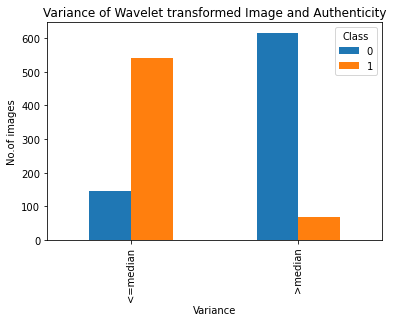

In [24]:
pd.crosstab(data.VariancE_OF_WTI_Cat,data.Class).plot(kind='bar')
plt.title('Variance of Wavelet transformed Image and Authenticity')
plt.xlabel('Variance')
plt.ylabel('No.of images')

Text(0, 0.5, 'Proportion of images')

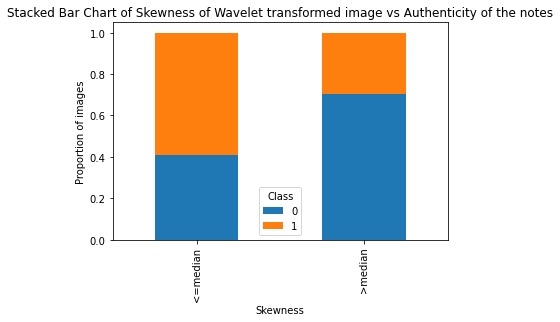

In [25]:
table=pd.crosstab(data.Skewness_OF_WTI_Cat,data.Class)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Skewness of Wavelet transformed image vs Authenticity of the notes')
plt.xlabel('Skewness')
plt.ylabel('Proportion of images')

Text(0, 0.5, 'No.of images')

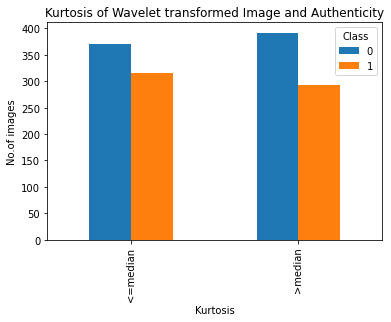

In [26]:
pd.crosstab(data.Kurtosis_OF_WTI_Cat,data.Class).plot(kind='bar')
plt.title('Kurtosis of Wavelet transformed Image and Authenticity')
plt.xlabel('Kurtosis')
plt.ylabel('No.of images')

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       1372 non-null   float64
 1   S       1372 non-null   float64
 2   K       1372 non-null   float64
 3   E       1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Implementing Logistic Regression

In [41]:
X = data1.loc[:, data1.columns != 'Class']     #feature
y = data1.loc[:, data1.columns == 'Class']     #target 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\angel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Prediction and calculating the accuracy measures

In [43]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


### ROC Curve

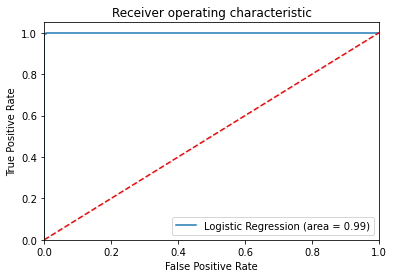

In [44]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))#computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])#creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### REPORT:

Here, the business / finance problem considered was to predict the authenticity of a bank note based on some variables such as variance, skewness, curtosis and entropy collected from the wavelet transformed images. Based on these four variables the notes where classified into authentic and non-authentic categories.

From the count plot it was clear that the proportion of notes in authentic and inauthentic class were almost equal (55 - 45). Hence logistic regression was directly applied to the data set without implementing smote.

The accuracy of the logistic regression classifier on the data was found out to be 0.99 which implies that the prediction using this technique will be 99% accurate.

In the last step, Reciever Operating Characteristic (ROC) Curve was plotted and the area under the curve was obtained. AUC obtained is 0.99 (closer to one) which is a good value for a binary classifier.